# Lesson 3: Exercises

## Exercise 1: Equilibrium reaction with intermediate state

We will consider again consider a batch reaction in a `CSTR` but this time, we will also account for an intermediate state:

$\require{mhchem}$
$$\ce{A <=>[k_{AB}][k_{BA}] B <=>[k_{BC}][k_{CB}] C}$$

***Task:*** Implement the reaction and plot the results. Assume the following values for the rate constants:
- $k_{AB} = 0.080~s^{-1}$
- $k_{BA} = 0.0~s^{-1}$
- $k_{BC} = 0.060~s^{-1}$
- $k_{CB} = 0.0~s^{-1}$

In [1]:
from CADETProcess.processModel import ComponentSystem
component_system = ComponentSystem(['A', 'B', 'C'])

In [2]:
from CADETProcess.processModel import MassActionLaw
reaction_system = MassActionLaw(component_system) 
reaction_system.add_reaction(
    indices=[0,1], 
    coefficients=[-1, 1],
    k_fwd=0.080,
    k_bwd=0.0
)
reaction_system.add_reaction(
    indices=[1,2], 
    coefficients=[-1, 1],
    k_fwd=0.06,
    k_bwd=0.0
)

In [3]:
from CADETProcess.processModel import Cstr
reactor = Cstr(component_system, 'reactor')
reactor.V = 1e-6
reactor.bulk_reaction_model = reaction_system
reactor.c = [1.0, 0.0, 0.0]

In [4]:
from CADETProcess.processModel import FlowSheet
flow_sheet = FlowSheet(component_system)
flow_sheet.add_unit(reactor)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'reaction_demo')
process.cycle_time = 100

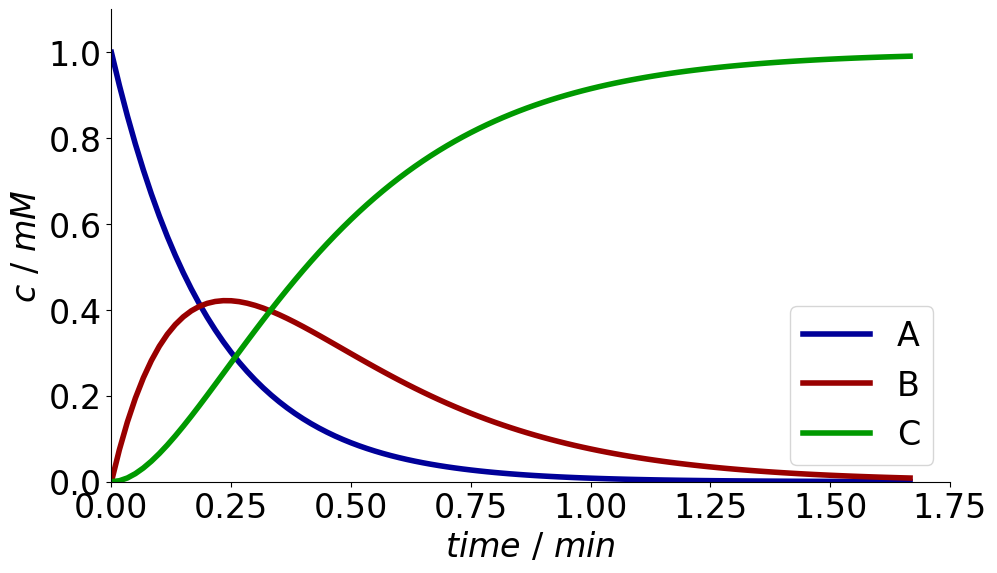

In [5]:
from CADETProcess.simulator import Cadet
simulator = Cadet()
sim_results = simulator.run(process)
_ = sim_results.solution.reactor.outlet.plot()

## Exercise 2: Equilibrium reaction with intermediate state in tubular reactor
***Task:*** Implement the reaction in a tubular reactor and plot the results at the outlet, as well as over the length of the column for the last timestep.

Consider again the reaction parameters from Exercise 1.
For the `TubularReactor` use the following parameters:
- length: 1 m
- diameter: 10 cm
- flow rate: 0.1 m³/s




***Hint:*** To plot the bulk solution, make sure that you set the `write_solution_bulk` flag in the `TubularReactor`.

In [6]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(['A', 'B','C'])

In [7]:
from CADETProcess.processModel import MassActionLaw

reaction_system = MassActionLaw(component_system) 
reaction_system.add_reaction(
    indices=[0, 1], 
    coefficients=[-1, 1],
    k_fwd=0.08,
    k_bwd=0.0
)
reaction_system.add_reaction(
    indices=[1, 2], 
    coefficients=[-1, 1],
    k_fwd=0.060,
    k_bwd=0.0
)

In [8]:
from CADETProcess.processModel import Inlet, TubularReactor, Outlet

inlet = Inlet(component_system, name='inlet')
inlet.c = [10, 0, 0]
inlet.flow_rate = 1e-4

outlet = Outlet(component_system, name= 'outlet')

reactor = TubularReactor(component_system, 'reactor')
reactor.length = 1
reactor.diameter = 0.1
reactor.bulk_reaction_model = reaction_system
reactor.c = [0.0, 0.0, 0.0]
reactor.axial_dispersion = 1e-7
reactor.solution_recorder.write_solution_bulk = True

In [9]:
from CADETProcess.processModel import FlowSheet

flow_sheet = FlowSheet(component_system)
flow_sheet.add_unit(reactor)
flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)
flow_sheet.add_connection(inlet, reactor)
flow_sheet.add_connection(reactor, outlet)

from CADETProcess.processModel import Process

process = Process(flow_sheet, 'reaction_demo')
process.cycle_time = 100

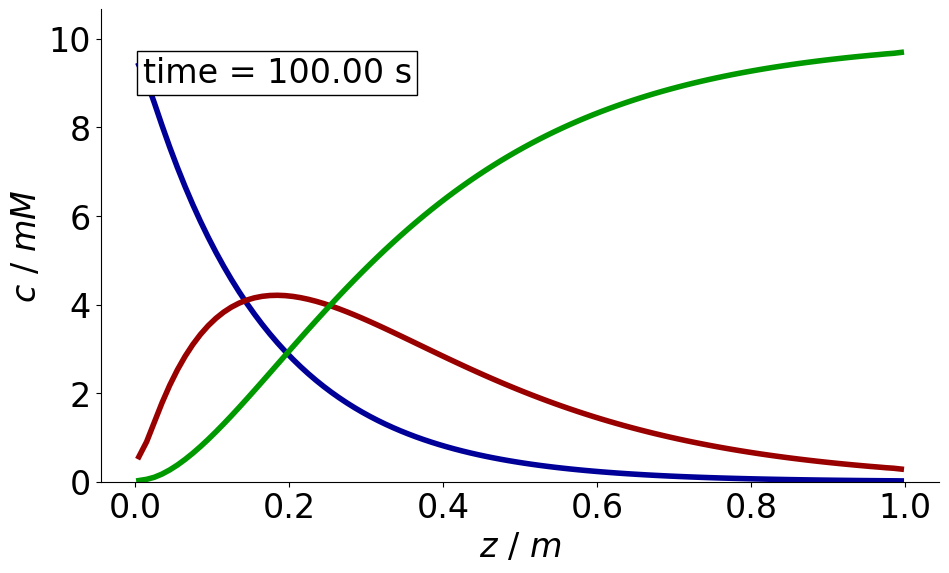

In [10]:
from CADETProcess.simulator import Cadet

simulator = Cadet()
sim_results = simulator.simulate(process)
_ = sim_results.solution.reactor.bulk.plot_at_time(100)

## Bonus Exercise

Try implementing other reaction systems such as:

$\require{mhchem}$
$$\ce{A + B ->[k_{1}] C}$$
$$\ce{2 A + B ->[k_{1}] C}$$
$$\ce{A + B <=>[k_{1}][k_{-1}] C ->[k_{2}] D}$$
$$\ce{A + B ->[k_{1}] C} \quad \text{and as a parallel reaction} \quad \ce{A + C ->[k_{2}] D}$$